<a href="https://colab.research.google.com/github/teja265919/Stock_Market_Prediction/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()
import io


training_data = pd.read_csv('/content/Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

In [ ]:
# Getting the inputs and outputs

x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)

(1257, 1)
(1257, 1)


In [ ]:
x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


In [ ]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 3s 5ms/step - loss: 0.0704
Epoch 2/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0647
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0621
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0597
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0573
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0549
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 8/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0500
Epoch 9/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0475
Epoch 10/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 11/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0425
Epoch 12/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0399
Epoch 13/200
40/40 [=================

In [ ]:
# getting the real stock of 2017 i.e., importing the test dataset
from google.colab import files
uploaded = files.upload()
import io
test_data = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [ ]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

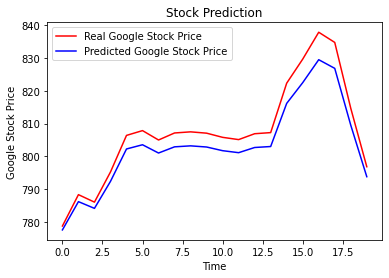

In [ ]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
# getting the real stock price of 2012 - 2016

training_data = pd.read_csv('/content/Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [ ]:

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

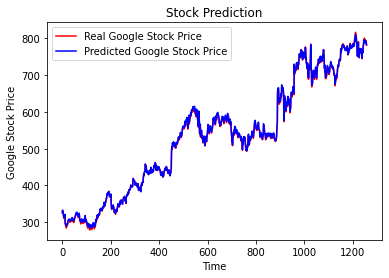

In [ ]:


plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()